# Apresentação:

O objetivo desse código é avançar nos estudos de **Redes Neurais** e **Deep Learning** agora no universo de **Regressão**, ou seja, problemas de predição quando $y$ está no **contínuo**, tal que $y \in \mathbb{R}$.

## Conjunto de Dados:

Para esse estudo, o conjunto de dados utilizados será o [*fetch california housing*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html), uma simplificação do California Housing que contém apenas características numéricas (não há característica `ocean_proximity`) e não há valores ausentes.

## Material Base:

* **Hands On Machine Learning with Scikit-Learn, Keras & TensorFlow** de *Aurélien Géron*;
* **Understanding Deep Learning** de *Simon J.D. Prince*;
* **Neural Networks and Learning Machines** de *Simon Haykin*.

## Documentações:

* https://scikit-learn.org/
* https://www.tensorflow.org/?hl=pt-br
* https://keras.io/api/

In [2]:
# Importações relevantes:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [4]:
# Biblioteca para Manipulação de dados:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
print(pd.__version__)

2.1.4


In [5]:
# Instanciando dados:
housing = fetch_california_housing();housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
df = pd.concat([pd.DataFrame(housing.data, columns=housing.feature_names),
           pd.DataFrame(housing.target, columns=housing.target_names)], axis=1); df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
# Estatisticas Descritivas dos dados:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
# Gerando dados de teste:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target
                                                             ) # defaut: 25% -> teste

# Subdividindo dados entre treino e validação:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full
                                                     ) # defaut: 25% -> validação

# Preprocessamento dados dados:

Dado que os dados já veem previamente tratados, sem `NaN` e demais problemas, essa etapa do processo é apenas para retirar a escala dos dados. Normalizar os dados tem suas vantagens:

* **Aumenta a velocidade de Convergência:** Dados normalizados ajudam a acelerar o processo de treinamento, permitindo que o algoritmo de otimização (como o gradiente descendente) converja mais rapidamente. Isso ocorre porque os gradientes são mais estáveis e consistentes quando os dados estão em uma escala similar.
  
* **Melhora o desempenho do Modelo:** Redes neurais treinadas com dados normalizados tendem a ter um desempenho melhor. Isso ocorre porque a normalização ajuda a evitar que algumas características dominem outras, permitindo que a rede aprenda de forma mais equilibrada.
  
* **Evita problemas numéricos:** Dados em escalas muito diferentes podem causar problemas numéricos durante o treinamento, como estouros ou subfluxos. A normalização ajuda a mitigar esses problemas, garantindo que os valores estejam dentro de uma faixa manejável.
  
* **Facilita a interpretação dos pesos:** Quando os dados são normalizados, os pesos aprendidos pela rede neural podem ser mais facilmente interpretados, pois cada peso estará ajustando características que estão na mesma escala.
  
* **Regulariza:** A normalização pode atuar como uma forma de regularização, ajudando a prevenir o overfitting ao garantir que a rede não se ajuste excessivamente a características específicas com valores extremos.

A escolha do método de padronização é importante. O método `StandardScaler()`, por padrão, trabalha a tradicional ideia da normalização para uma **normal padrão**, $Z \sim N(0,1)$,

$$Z \sim \frac{X-\mu}{\sigma}$$

Ou seja, ele pressupõe que os dados de treino $X_i$ forma  possuem uma distribuição normal, tal que $X_i \sim N(\mu,\sigma^2)$. Dado o **Teorema Central do Limite**, essas suposições são comuns, mas é sempre bom ter cuidado com as generalizações. Outro ponto importante é que o `StandardScaler` é **sensível a outliers**, e as características podem ser escaladas de maneira diferente na presença de outliers.

In [9]:
# Instanciando classe de Escalonamento:
scaler = StandardScaler()

# Reescalodando dados:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Multilayer Perceptron para Regressão:

A estrutura de uma rede para **regressão** é muito parecida com o caso de regressão, por óbvio, dodo que é o mesmo modelo, o que muda são as funções de ativação, sobretudo a função da última camada. Não faz sentido matemático fazer regressão com uma *softmax*.

Na teoria, a mudança da função objetivo tem um impacto significativo na matemática da construção do modelo. Na prática, utilizando APIs e soluções prontas, essa mudança fica menos perceptivel, muitas vezes resumidas a mudança de configurações pontuais.

In [10]:
# Instanciando Modelo:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # Saída
])

Note que não houve a necessidade de definir uma função de ativação.

In [11]:
# Configurando Função Objetivo e Otimizador:
model.compile(loss="mean_squared_error", # MSE: Soma dos erros normalizado pelos graus de liberdade
              optimizer="sgd" # Gradiente Descendente Estocástico: Aplicação da Regra de Fermat
             )

In [12]:
# Ajuste do Modelo:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: inf - val_loss: 6986356338537286217578315776.0000
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 486264474817816949895987200.0000 - val_loss: 2981134410914832842752.0000
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 207493553983468863488.0000 - val_loss: 1272075629101056.0000
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 88539148582912.0000 - val_loss: 542804288.0000
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 37780300.0000 - val_loss: 232.3952
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 17.3719 - val_loss: 1.2891
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3357 - val_loss: 1.2889
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3356 - val_loss: 1.2889
Epoch 9/20
363/363 [==============================] - 0s 1ms/st

In [13]:
# Validação do Modelo:
mse_test = model.evaluate(X_test, y_test)
print(f"MSE de Teste: {mse_test}")

162/162 [==============================] - 0s 949us/step - loss: 1.3595
MSE de Teste: 1.3595330715179443


# Análise Visual do Modelo:

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
y_pred = model.predict(X_valid)

121/121 [==============================] - 0s 2ms/step


In [36]:
from sklearn.metrics import r2_score

# Calcule o R²
y_pred_test = model.predict(X_test)
r2 = r2_score(y_test, y_pred_test)
print("R² no conjunto de teste:", r2)

162/162 [==============================] - 0s 869us/step
R² no conjunto de teste: -0.00367574877396315


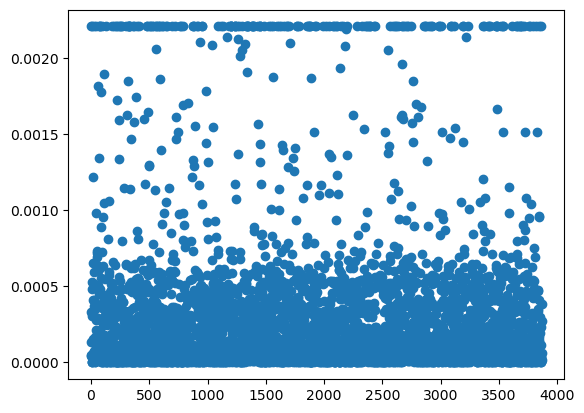

In [37]:
# Resíduos:
residuos = ((y_valid - y_pred.flatten())**2)/len(y_valid)

indice = np.arange(len(y_valid))
plt.scatter(indice,residuos);

**Conclusão**

Vemos que claramento, o modelo não ficou muito bom... Note que a construção do modelo não é um processo fácil. Fica então esse resultado **errático**, para demonstrar como é complexo a construção de um modelo.

# Avaliando Pesos e Viéses:

In [19]:
params = {}
for i,layer in enumerate(model.layers):
    pesos, biases = layer.get_weights()
    params[f"Camada_{i}"] = {"pesos": pesos, "vieses": biases}

In [20]:
# Camadas:
params.keys()

dict_keys(['Camada_0', 'Camada_1'])

In [21]:
params["Camada_0"]["vieses"].shape

(30,)

In [22]:
params

{'Camada_0': {'pesos': array([[-8.58065928e+11, -1.04987132e+12, -9.39487265e+11,
           4.16395068e-02, -5.02370977e+00,             nan,
          -3.47803000e+05, -9.45970532e+12, -2.64318157e+11,
          -4.28327936e+10, -4.90022863e+11, -5.76508264e+11,
           1.40440226e-01, -7.89641738e-02, -4.93593305e-01,
          -5.31933498e+00, -1.17810659e+12, -1.62236631e-01,
          -9.50084925e-01, -4.25011625e+05, -1.63554460e-01,
                      nan, -3.33323169e+00,             nan,
          -5.21046877e+00, -3.40365052e+00, -8.31154160e+11,
          -3.01495814e+00, -3.81195545e-03, -5.53762507e+13],
         [-6.58331717e+12, -8.05489974e+12, -7.20800160e+12,
           2.45105028e-02, -3.31433334e+01,             nan,
          -5.64708350e+06, -9.17732640e+14, -2.02792082e+12,
          -3.28624767e+11, -3.75958877e+12, -5.59298988e+13,
          -3.92131418e-01,  5.42922318e-02, -1.62492800e+00,
          -3.69893341e+01, -9.03875343e+12,  5.39523363e-03,
  